In [7]:
#Projet Otpion-python :
# Vabre Nathan 
# Coustaury Teddy
# Benoit Nathan
# Gonzalez Audrey 

In [8]:
#Projet groupe NAthan VABRE, Teddy COUSTAURY, Audrey GONZALEZ, Nathan Benoit 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# On charge le dataset
projet_data = pd.read_csv('export_alimconfiance@dgal.csv', delimiter=';')
projet_data.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,PIZZARIA CHEZ PEPONE,P00045125001,BP 220 MATA UTU,98600,Uvea,23-033715-1,2023-05-06T02:00:00+02:00,Restaurant,Très satisfaisant,NaN,"-13.267012, -176.165226",Restaurant,Autres
1,JLS UTUFUA,P00004673003,UTUFUA,98600,Uvea,23-030873-1,2023-04-24T02:00:00+02:00,"Alimentation générale,Boucherie-Charcuterie",Satisfaisant,NaN,"-13.344456, -176.200438","Alimentation générale,Boucherie-Charcuterie",Autres
2,Restaurant pédagogique Kulo Lasi,"382001,00 F",MATA-UTU,98600,Uvea,23-018566-1,2023-03-15T01:00:00+01:00,Restaurant,Satisfaisant,NaN,"-13.274984, -176.199044",Restaurant,Autres
3,la sem,P00008264001,NaN,98600,Uvea,22-102539-1,2022-12-21T01:00:00+01:00,Rayon traiteur,Satisfaisant,NaN,"-13.281431, -176.186442",Rayon traiteur,Autres
4,la sem,P00008264001,NaN,98600,Uvea,23-004690-1,2023-01-26T01:00:00+01:00,"Rayon fromagerie,Rayon boucherie-charcuterie",Satisfaisant,NaN,"-13.281628, -176.186262","Rayon fromagerie,Rayon boucherie-charcuterie",Autres


In [9]:
# la tablprojet_datae globale
projet_data.shape

# la table lorsqu’on retire les lignes avec données manquantes
projet_data.dropna().shape

# la table lorsqu’on retire les colonnes avec des données manquantes
#= donné manquante sur 5 colonnes 
projet_data.dropna(axis = 1).shape

(32695, 8)

In [10]:
#affiche les colonnes dont on a besoin 
projet_data2 = projet_data[[ "Synthese_eval_sanit","Code_postal"]]
display(projet_data2)

,Synthese_eval_sanit,Code_postal
0,Très satisfaisant,98600
1,Satisfaisant,98600
2,Satisfaisant,98600
3,Satisfaisant,98600
4,Satisfaisant,98600
...,...,...
32690,Très satisfaisant,1000
32691,Très satisfaisant,1000
32692,Satisfaisant,1000
32693,Très satisfaisant,1000


In [11]:
# remplace les champs object par des int 
projet_data3 = {"A corriger de manière urgente":"1", "A améliorer":"2", "Satisfaisant": "3", "Très satisfaisant":"4"}
projet_data2["Synthese_eval_sanit"] = projet_data2["Synthese_eval_sanit"].map(projet_data3)
display(projet_data2)


/var/folders/p8/337tvhp54172brsp8q0v0wpc0000gn/T/ipykernel_21935/1752241809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projet_data2["Synthese_eval_sanit"] = projet_data2["Synthese_eval_sanit"].map(projet_data3)


,Synthese_eval_sanit,Code_postal
0,4,98600
1,3,98600
2,3,98600
3,3,98600
4,3,98600
...,...,...
32690,4,1000
32691,4,1000
32692,3,1000
32693,4,1000


In [12]:
projet_data2["Code_postal"] = projet_data2["Code_postal"].astype(int)
projet_data2["Synthese_eval_sanit"] = projet_data2["Synthese_eval_sanit"].astype(int)
display(projet_data2)
print(projet_data2.dtypes)

/var/folders/p8/337tvhp54172brsp8q0v0wpc0000gn/T/ipykernel_21935/2272352565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projet_data2["Code_postal"] = projet_data2["Code_postal"].astype(int)
/var/folders/p8/337tvhp54172brsp8q0v0wpc0000gn/T/ipykernel_21935/2272352565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projet_data2["Synthese_eval_sanit"] = projet_data2["Synthese_eval_sanit"].astype(int)


,Synthese_eval_sanit,Code_postal
0,4,98600
1,3,98600
2,3,98600
3,3,98600
4,3,98600
...,...,...
32690,4,1000
32691,4,1000
32692,3,1000
32693,4,1000


Synthese_eval_sanit    int64
Code_postal            int64
dtype: object


In [13]:
#ducoup plus aucune donnee manquante 
# la tablprojet_datae globale
projet_data2.shape

# la table lorsqu’on retire les lignes avec données manquantes
projet_data2.dropna().shape

# la table lorsqu’on retire les colonnes avec des données manquantes
#= donné manquante sur 5 colonnes 
projet_data2.dropna(axis = 1).shape

(32695, 2)

In [14]:
projet_data2.head()

,Synthese_eval_sanit,Code_postal
0,4,98600
1,3,98600
2,3,98600
3,3,98600
4,3,98600


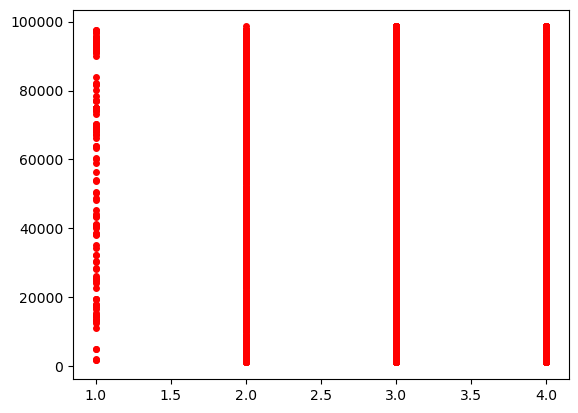

[[67571.00290087]
 [-3199.29944297]]


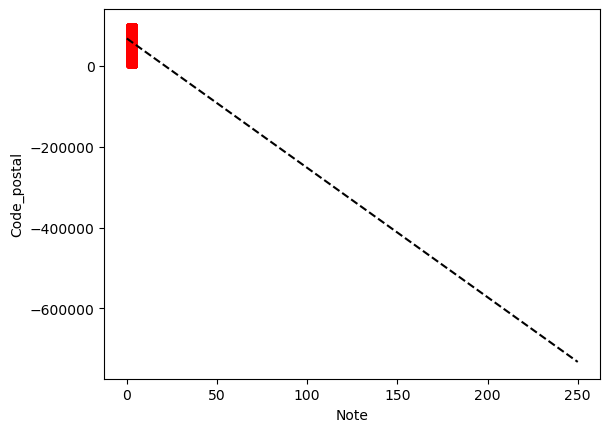

In [15]:
# On affiche le nuage de points dont on dispose
plt.plot(projet_data2['Synthese_eval_sanit'], projet_data2['Code_postal'], 'ro', markersize=4)
plt.show()
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(projet_data2.shape[0]), projet_data2['Synthese_eval_sanit'].values]).T
y = np.matrix(projet_data2['Code_postal']).T


# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


print(theta)




plt.xlabel('Note')
plt.ylabel('Code_postal')

plt.plot(projet_data2['Synthese_eval_sanit'], projet_data2['Code_postal'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

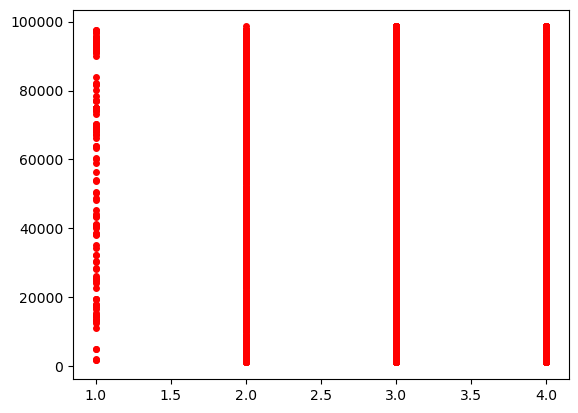

[[67571.00290087]
 [-3199.29944297]]


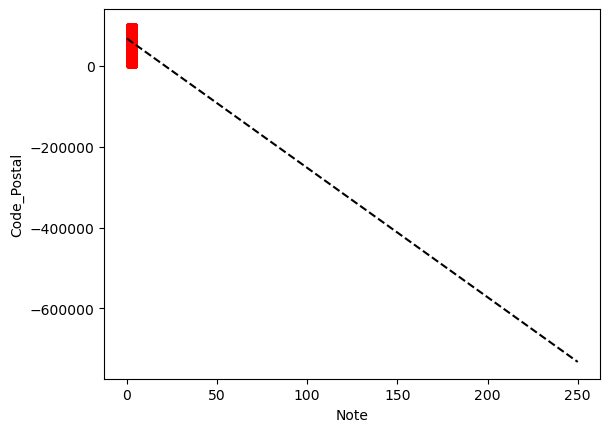

In [16]:
# On affiche le nuage de points dont on dispose
plt.plot(projet_data2['Synthese_eval_sanit'], projet_data2['Code_postal'], 'ro', markersize=4)
plt.show()
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(projet_data2.shape[0]), projet_data2['Synthese_eval_sanit'].values]).T
y = np.matrix(projet_data2['Code_postal']).T


# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


print(theta)


plt.xlabel('Note')
plt.ylabel('Code_Postal')

plt.plot(projet_data2['Synthese_eval_sanit'], projet_data2['Code_postal'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

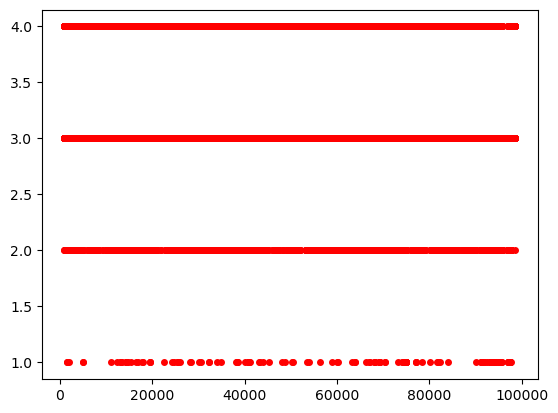

[[ 3.40444661e+00]
 [-1.58617977e-06]]


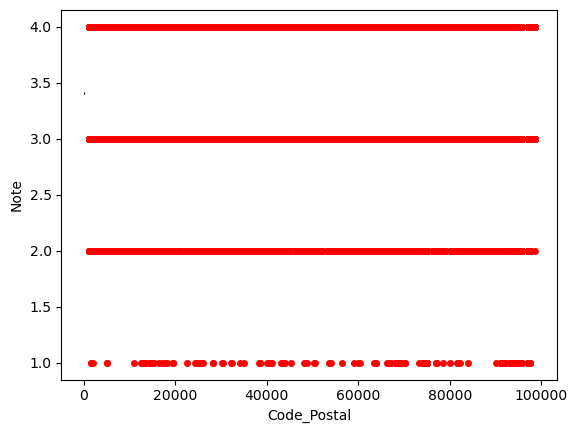

In [17]:

# On affiche le nuage de points dont on dispose
plt.plot(projet_data2['Code_postal'], projet_data2['Synthese_eval_sanit'], 'ro', markersize=4)
plt.show()
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(projet_data2.shape[0]), projet_data2['Code_postal'].values]).T
y = np.matrix(projet_data2['Synthese_eval_sanit']).T


# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


print(theta)


plt.xlabel('Code_Postal')
plt.ylabel('Note')

plt.plot(projet_data2['Code_postal'], projet_data2['Synthese_eval_sanit'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

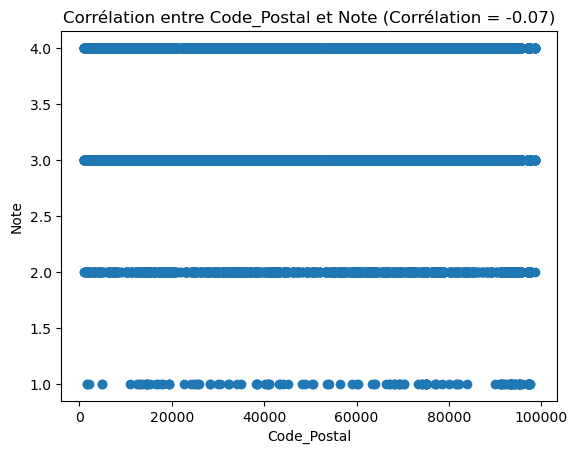

In [18]:
# Calculer la corrélation entre les deux colonnes
correlation = projet_data2['Code_postal'].corr(projet_data2['Synthese_eval_sanit'])

# Créer un graphique de dispersion pour visualiser la corrélation
plt.scatter(projet_data2['Code_postal'], projet_data2['Synthese_eval_sanit'])
plt.title(f"Corrélation entre Code_Postal et Note (Corrélation = {correlation:.2f})")
plt.xlabel("Code_Postal")
plt.ylabel("Note")

# Afficher le graphique
plt.show()

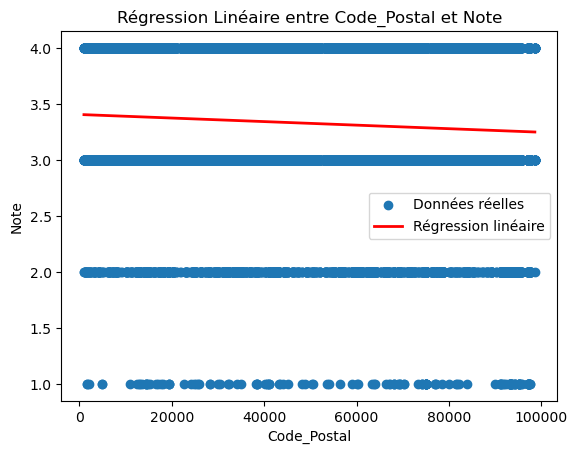

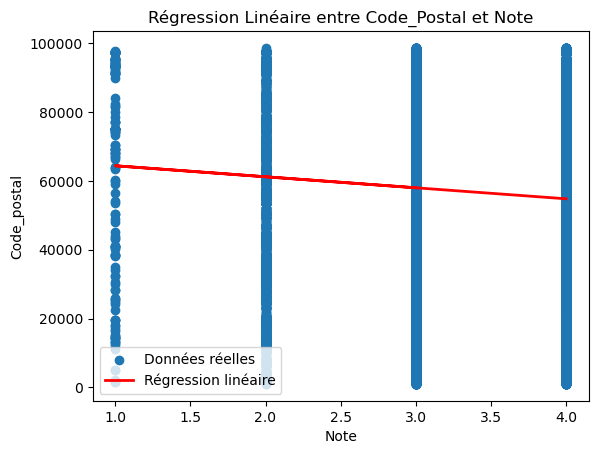

In [19]:
# Créez un modèle de régression linéaire
model = LinearRegression()

# Ajustez le modèle aux données
X = projet_data2[['Code_postal']]
y = projet_data2['Synthese_eval_sanit']
model.fit(X, y)

# Prédisez les valeurs de Note en fonction des codes postaux
y_pred = model.predict(X)

# Créer un graphique pour visualiser la régression linéaire
plt.scatter(X, y, label="Données réelles")
plt.plot(X, y_pred, color='red', linewidth=2, label="Régression linéaire")
plt.title("Régression Linéaire entre Code_Postal et Note")
plt.xlabel("Code_Postal")
plt.ylabel("Note")
plt.legend()

# Afficher le graphique
plt.show()

# Créez un modèle de régression linéaire
model = LinearRegression()

# Ajustez le modèle aux données
X = projet_data2[['Synthese_eval_sanit']]
y = projet_data2['Code_postal']
model.fit(X, y)

# Prédisez les valeurs de Note en fonction des codes postaux
y_pred = model.predict(X)

# Créer un graphique pour visualiser la régression linéaire
plt.scatter(X, y, label="Données réelles")
plt.plot(X, y_pred, color='red', linewidth=2, label="Régression linéaire")
plt.title("Régression Linéaire entre Code_Postal et Note")
plt.xlabel("Note")
plt.ylabel("Code_postal")
plt.legend()

# Afficher le graphique
plt.show()

In [20]:
import numpy.polynomial.polynomial as poly # Pour les manipulations de polynômes

X = np.matrix([np.ones(projet_data2.shape[0]), projet_data2['Code_postal'].values]).T
y = np.matrix(projet_data2['Synthese_eval_sanit']).T
print(X,y)

# Pour le polynôme d'approximation de degré d=1
P = poly.polyfit(X, y, 1)
P  # Coefficients du polynome de régression dans l'ordre croissant des degrés

[[1.00e+00 9.86e+04]
 [1.00e+00 9.86e+04]
 [1.00e+00 9.86e+04]
 ...
 [1.00e+00 1.00e+03]
 [1.00e+00 1.00e+03]
 [1.00e+00 1.00e+03]] [[4]
 [3]
 [3]
 ...
 [3]
 [4]
 [3]]


TypeError: expected 1D vector for x

<Axes: >

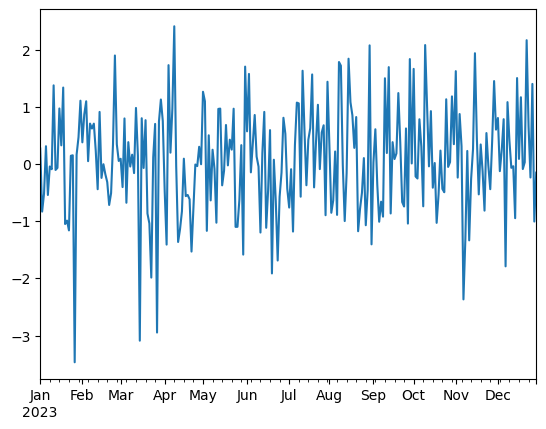

In [21]:
#L'intérêt des time series de pandas réside dans l'utilisation 
#d'une indexation des données par des timestamps
projet_data2 = pd.bdate_range('2023-01-01','2023-12-31')
data = np.random.randn(projet_data2.size)
pd.Series(data, index=projet_data2).plot()

<Axes: >

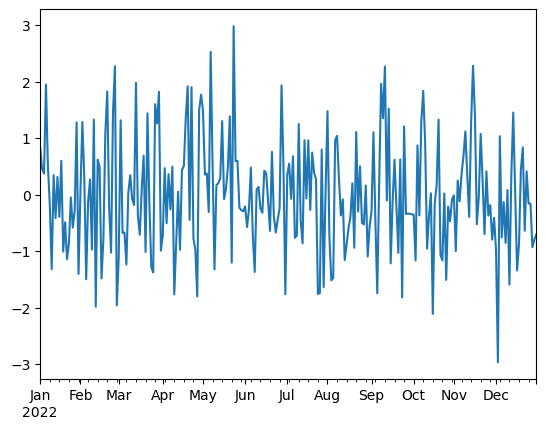

In [22]:
projet_data2 = pd.bdate_range('2022-01-01','2022-12-31')
data = np.random.randn(projet_data2.size)
pd.Series(data, index=projet_data2).plot()